In [45]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot


In [3]:
df = pd.read_csv("netflix_titles.csv", encoding = 'utf-8')

In [4]:
df.shape

(6234, 12)

In [34]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# since a lot of columns in director column are NaN, I am dropping that column

In [6]:
df = df.drop(columns = ['description','date_added','rating','show_id','director'])

In [7]:
df.shape

(6234, 7)

In [49]:
df.head()

,type,title,cast,country,release_year,duration,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,90 min,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016,94 min,Stand-Up Comedy
2,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,1 Season,Kids' TV
3,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,1 Season,Kids' TV
4,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,99 min,Comedies


In [50]:
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [17]:
df['release_year'].value_counts()

2018    1063
2017     959
2019     843
2016     830
2015     517
2014     288
2013     237
2012     183
2010     149
2011     136
2009     121
2008     107
2007      71
2006      68
2005      63
2004      49
2003      43
2002      38
2001      34
2000      31
1997      31
1998      26
2020      25
1999      21
1993      19
1995      17
1996      17
1992      16
1990      15
1991      15
        ... 
1978       7
1979       7
1976       7
1987       5
1975       5
1977       5
1968       4
1972       4
1960       4
1945       3
1946       3
1943       3
1962       3
1971       3
1967       3
1944       3
1958       2
1965       2
1942       2
1969       2
1954       1
1966       1
1970       1
1947       1
1955       1
1959       1
1963       1
1964       1
1956       1
1925       1
Name: release_year, Length: 72, dtype: int64

In [ ]:
# Sorting by release year and dropping the year from 1925 to 2005 as the count is small and it has NaN values

In [37]:
sorted_df = df.sort_values('release_year')

In [38]:
df = sorted_df.iloc[574:]

In [39]:
df.head()

,type,title,cast,country,release_year,duration,listed_in
5076,Movie,Rumor Has It,"Jennifer Aniston, Kevin Costner, Shirley MacLa...","United States, Germany, Australia",2005,97 min,"Comedies, Romantic Movies"
913,Movie,V for Vendetta,"Natalie Portman, Hugo Weaving, Stephen Rea, St...","United States, United Kingdom, Germany",2005,132 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy"
1301,Movie,Lucky: No Time for Love,"Salman Khan, Sneha Ullal, Mithun Chakraborty, ...",India,2005,131 min,"Dramas, International Movies, Romantic Movies"
3662,Movie,Kay Dyache Bola,"Makarand Anaspure, Akshay Pendse, Umesh Kamat,...",India,2005,133 min,"Comedies, Dramas, International Movies"
2170,Movie,Chicken Little,"Zach Braff, Joan Cusack, Patrick Stewart, Stev...",United States,2005,82 min,"Children & Family Movies, Comedies"


In [59]:
## add new features in the dataset

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

C:\Users\revat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\revat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,type,title,cast,country,release_year,duration,listed_in,from_us,season_count
5076,Movie,Rumor Has It,"Jennifer Aniston, Kevin Costner, Shirley MacLa...","United States, Germany, Australia",2005,97,"Comedies, Romantic Movies",1,
913,Movie,V for Vendetta,"Natalie Portman, Hugo Weaving, Stephen Rea, St...","United States, United Kingdom, Germany",2005,132,"Action & Adventure, Dramas, Sci-Fi & Fantasy",1,
1301,Movie,Lucky: No Time for Love,"Salman Khan, Sneha Ullal, Mithun Chakraborty, ...",India,2005,131,"Dramas, International Movies, Romantic Movies",0,
3662,Movie,Kay Dyache Bola,"Makarand Anaspure, Akshay Pendse, Umesh Kamat,...",India,2005,133,"Comedies, Dramas, International Movies",0,
2170,Movie,Chicken Little,"Zach Braff, Joan Cusack, Patrick Stewart, Stev...",United States,2005,82,"Children & Family Movies, Comedies",1,


In [40]:
df.isna().sum()

type              0
title             0
cast            554
country         462
release_year      0
duration          0
listed_in         0
dtype: int64

In [41]:
df.shape

(5660, 7)

In [47]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6a749b", "#a688de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

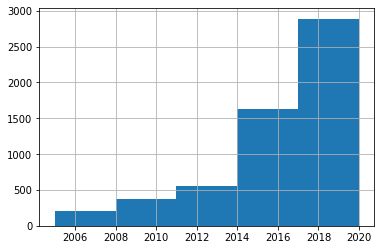

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
df['release_year'].hist(bins=5)

In [ ]:
## TOP ACTORS - FROM MOVIES LIST

In [116]:
from collections import Counter
from matplotlib import pyplot as plt

def country_trace(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(title="Top actors in each country",height=1200, showlegend=False)
fig.show()

C:\Users\revat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
## TOP ACTORS - FROM TV LIST

In [117]:
traces = []
titles = ["United States","", "United Kingdom", "", "Canada"]
for title in titles:
    if title != "":
        traces.append(country_trace(title, flag="tv_shows"))

fig = make_subplots(rows=2, cols=3, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 2,2)
# fig.add_trace(traces[3], 2,3)

fig.update_layout(title="Top TV Shows actors in each country", height=900, showlegend=False)
fig.show()                                

C:\Users\revat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
## nothing to predict (no target variable), use clustering and groupby genre / cast

In [76]:
df.isna().sum()

type              0
title             0
cast            554
country         462
release_year      0
duration          0
listed_in         0
from_us           0
season_count      0
dtype: int64

In [95]:
new_df = df[['title','cast','listed_in','country']]
new_df.head()

new_df.dropna(inplace=True)

blanks = []  # start with an empty list

col=['title','cast','listed_in','country']
for i,col in new_df.iterrows():  # iterate over the DataFrame
    if type(col)==str:            # avoid NaN values
        if col.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

new_df.drop(blanks, inplace=True)

C:\Users\revat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [96]:
new_df.head()

,title,cast,listed_in,country
5076,Rumor Has It,"Jennifer Aniston, Kevin Costner, Shirley MacLa...","Comedies, Romantic Movies","United States, Germany, Australia"
913,V for Vendetta,"Natalie Portman, Hugo Weaving, Stephen Rea, St...","Action & Adventure, Dramas, Sci-Fi & Fantasy","United States, United Kingdom, Germany"
1301,Lucky: No Time for Love,"Salman Khan, Sneha Ullal, Mithun Chakraborty, ...","Dramas, International Movies, Romantic Movies",India
3662,Kay Dyache Bola,"Makarand Anaspure, Akshay Pendse, Umesh Kamat,...","Comedies, Dramas, International Movies",India
2170,Chicken Little,"Zach Braff, Joan Cusack, Patrick Stewart, Stev...","Children & Family Movies, Comedies",United States


In [80]:
new_df.shape

(4726, 4)

In [97]:
new_df['cast'] = new_df['cast'].map(lambda x: x.split(',')[:3])

# putting the genres in a list of words
new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))

# new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
#     row['director'] = ''.join(row['director']).lower()

C:\Users\revat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\revat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [98]:
new_df.set_index('title', inplace = True)
new_df.head()

,cast,listed_in,country
title,,,
Rumor Has It,"[jenniferaniston, kevincostner, shirleymaclaine]","[comedies, romantic movies]","United States, Germany, Australia"
V for Vendetta,"[natalieportman, hugoweaving, stephenrea]","[action & adventure, dramas, sci-fi & fantasy]","United States, United Kingdom, Germany"
Lucky: No Time for Love,"[salmankhan, snehaullal, mithunchakraborty]","[dramas, international movies, romantic movies]",India
Kay Dyache Bola,"[makarandanaspure, akshaypendse, umeshkamat]","[comedies, dramas, international movies]",India
Chicken Little,"[zachbraff, joancusack, patrickstewart]","[children & family movies, comedies]",United States


In [86]:
# generating the cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
# Joining words

new_df['words'] = ''
column = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
            words = words + ', '.join(row[col])+ ', '
#         else:
#             words = words + row[col]+ ' '
    row['words'] = words
    
new_df.drop(columns = [col for col in new_df.columns if col!= 'words'], inplace = True)

C:\Users\revat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [100]:
new_df.head()

,bag_of_words
title,
Rumor Has It,"jenniferaniston, kevincostner, shirleymaclaine..."
V for Vendetta,"natalieportman, hugoweaving, stephenrea, actio..."
Lucky: No Time for Love,"salmankhan, snehaullal, mithunchakraborty, dra..."
Kay Dyache Bola,"makarandanaspure, akshaypendse, umeshkamat, co..."
Chicken Little,"zachbraff, joancusack, patrickstewart, childre..."


In [112]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(new_df['words'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(new_df.index)
indices[:5]

In [102]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.        , 0.38729833, ..., 0.        , 0.        ,
        0.12909944],
       [0.        , 1.        , 0.10540926, ..., 0.        , 0.        ,
        0.10540926],
       [0.38729833, 0.10540926, 1.        , ..., 0.        , 0.        ,
        0.1       ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.54772256,
        0.25819889],
       [0.        , 0.        , 0.        , ..., 0.54772256, 1.        ,
        0.28284271],
       [0.12909944, 0.10540926, 0.1       , ..., 0.25819889, 0.28284271,
        1.        ]])

In [103]:
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(new_df.index)[i])
        
    return recommended_movies

In [108]:
recommendations("Atlantics")

['Pihu',
 'ROMA',
 'Time Share',
 'Dagh Ujala',
 'Music Teacher',
 'Kia and Cosmos',
 'Mantra',
 'Mantostaan',
 'Union Leader',
 'Another Forever']

In [110]:
recommendations("Good People")

['The Great Raid',
 'The Hateful Eight',
 'Spider-Man 3',
 'Cave',
 'Limitless',
 'Inception',
 '10,000 B.C.',
 'Ninja Assassin',
 'The Hollow Point',
 'The Prince']

In [107]:
recommendations("The Zoya Factor")

['Ek Ladki Ko Dekha Toh Aisa Laga',
 'Chal Dhar Pakad',
 'Delhi 6',
 'Solo',
 'Irada Pakka',
 'Warehoused',
 'Pad Man',
 'Khoobsurat',
 'Thank You',
 'Sudani from Nigeria']